In [1]:
import sys
import numpy as np
import pandas as pd
sys.path.append('..')
from main import BlockAnalysis
import matplotlib.pyplot as plt

In [2]:
time, rg, bias = np.loadtxt('cv_bias.dat',unpack=True)

### Error estimation for time-correlated data series

In [3]:
'''
The variable rg contains the time-evolution of the radius
of gyration of peptide obtained from an MD simulation 

With the multi keyword you indicate that the rg array
is made from the concatenation of 2 indipendent trajectoy.
The result is that there will not be blocks covering the 
end of a trajectory and the beginning of the other. 
'''
block_rg = BlockAnalysis(rg, multi=2)

    Block size       SEM      err(SEM)
0          1.0  0.000345  3.453561e-07
1          2.0  0.000487  6.900555e-07
2          3.0  0.000596  1.034471e-06
3          4.0  0.000688  1.378636e-06
4          6.0  0.000842  2.066268e-06
5          9.0  0.001030  3.096114e-06
6         12.0  0.001188  4.124200e-06
7         18.0  0.001452  6.175476e-06
8         31.0  0.001899  1.060001e-05
9         36.0  0.002044  1.229471e-05
10        62.0  0.002668  2.105998e-05
11        93.0  0.003248  3.139640e-05
12       124.0  0.003729  4.162676e-05
13       186.0  0.004522  6.182361e-05
14       223.0  0.004926  7.373857e-05
15       279.0  0.005468  9.155983e-05
16       372.0  0.006243  1.207375e-04
17       446.0  0.006765  1.432508e-04
18       558.0  0.007497  1.776058e-04
19       669.0  0.008104  2.102263e-04
20       892.0  0.009208  2.758788e-04
21      1116.0  0.010061  3.372315e-04
22      1338.0  0.010887  3.996614e-04
23      2007.0  0.012646  5.689837e-04
24      2676.0  0.014195 

Text(0, 0.5, 'SEM')

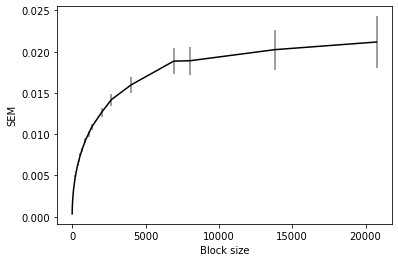

In [4]:
'''
After initializing the class we can call the statistics
from the block averaging
'''
print(pd.DataFrame(block_rg.stat, columns=['Block size', 'SEM', 'err(SEM)']))
plt.errorbar(block_rg.stat[...,0], block_rg.stat[...,1], block_rg.stat[...,2], fmt='', color='k', ecolor='0.5')
plt.xlabel('Block size')
plt.ylabel('SEM')

Mean: 1.2831128903414666
SEM: 0.01884921578247982
Decorrelating block length: 6913.0


Text(0, 0.5, 'SEM')

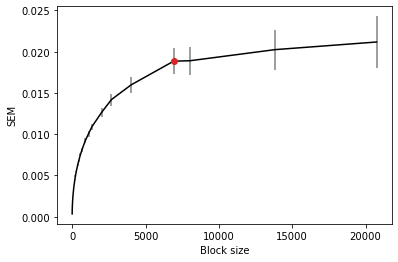

In [5]:
'''
To avoid manually picking the point in the block profile
at the beginning of the plateau (decorrelating block length,
where the SEM have the less uncertainty), we can rely on
automatic recognition of the decorrelating block length.
'''
block_rg.SEM()
print('Mean:', block_rg.av)
print('SEM:', block_rg.sem)
print('Decorrelating block length:', block_rg.bs)
plt.errorbar(block_rg.stat[...,0], block_rg.stat[...,1], block_rg.stat[...,2], fmt='', color='k', ecolor='0.5')
plt.scatter(block_rg.bs, block_rg.sem,zorder=10,c='tab:red')
plt.xlabel('Block size')
plt.ylabel('SEM')

### Error estimation for the free-energy of biased time-correlated data series (MetaD)

In [3]:
'''
The dataset loaded in the 2nd cell comes from a WTMetaD run where the
rg is a biased CV. In this case we perform the block analysis on
the FES, rather than on the CV.

The class can take either the Boltzmann weights in input, or MetaD bias
and temperature and estimate the weights internally.
'''
block_fes = BlockAnalysis(rg,bias=bias,T=310,multi=2,interval_low=0.6,interval_up=2.5)

    Block size       SEM  err(SEM)
0          1.0  0.085279  0.000085
1          2.0  0.098533  0.000140
2          3.0  0.107408  0.000186
3          4.0  0.116443  0.000233
4          6.0  0.128634  0.000316
5          9.0  0.144569  0.000435
6         12.0  0.156809  0.000544
7         18.0  0.173809  0.000739
8         31.0  0.204783  0.001143
9         36.0  0.212796  0.001280
10        62.0  0.251966  0.001989
11        93.0  0.280106  0.002708
12       124.0  0.309661  0.003457
13       186.0  0.343966  0.004703
14       223.0  0.354195  0.005302
15       279.0  0.373766  0.006259
16       372.0  0.406184  0.007855
17       446.0  0.419780  0.008889
18       558.0  0.461516  0.010933
19       669.0  0.460886  0.011956
20       892.0  0.468265  0.014030
21      1116.0  0.474485  0.015905
22      1338.0  0.502471  0.018446
23      2007.0  0.541683  0.024371
24      2676.0  0.558206  0.029020
25      4014.0  0.625817  0.039901
26      6913.0  0.679820  0.057049
27      8028.0  0.65

Text(0, 0.5, '<SEM>(FES) [kJ/mol]')

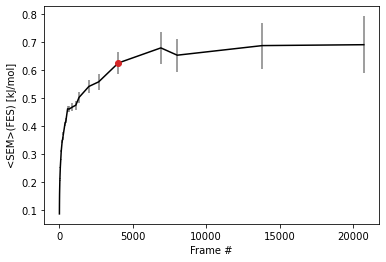

In [4]:
print(pd.DataFrame(block_fes.stat, columns=['Block size', 'SEM', 'err(SEM)']))
plt.errorbar(block_fes.stat[...,0], block_fes.stat[...,1], block_fes.stat[...,2], fmt='', color='k', ecolor='0.5')
block_fes.SEM()
plt.scatter(block_fes.bs, block_fes.sem,zorder=10,c='tab:red')
plt.xlabel('Frame #')
plt.ylabel('<SEM>(FES) [kJ/mol]')

In [5]:
'''
Beware that in this last case the SEM obtained is just an
average of the SEM over the FES. Calculating the average SEM
is only useful to get a decorrelating block size. We can indeed
use that information to obtain histograms and free-energy surfaces
with error bars specific for each point.
'''
binC, H, E = block_fes.get_pdf()

Text(0.5, 0, 'Rg')

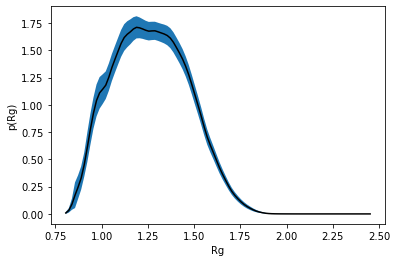

In [6]:
plt.plot(binC, H, 'k')
plt.fill_between(binC, H-E, H+E)
plt.ylabel('p(Rg)')
plt.xlabel('Rg')

Text(0.5, 0, 'Rg')

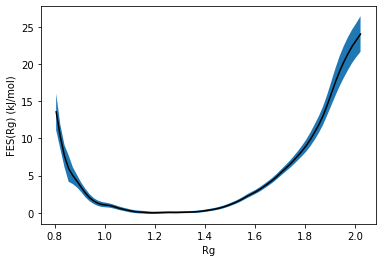

In [7]:
binC, FES, FES_err = block_fes.get_fes()
plt.plot(binC, FES, 'k')
plt.fill_between(binC, FES-FES_err, FES+FES_err)
plt.ylabel('FES(Rg) (kJ/mol)')
plt.xlabel('Rg')